### Algorithm overview

- Compute distance between each pair of in-nodes and out-nodes (geodesic distance on globe, later "distance" can be modified to include trade barriers, etc.)
- Probability/affinity of edge between (u,v) is proportional to in(u) * in(v) / dist(u,v)
- Connect nodes and assign weights according to iterative proportional fitting
- Validate data: pred_exp = sum(outflows from grid cells in i that are international edges) (same for imports)
- Note that the validation step doesn't actually test the network, it just looks at the net flow
- TODO: as of now, we just look at marginals (total imports and exports) rather than country flows. The model would be better if we train it on the marginals (force the network to match exisitng import and export values) and then compare it with actual data.

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Running Gravity Model with thresholding at 20% of possible edges...
[INFO] Adjusted tariff-based distance matrix created. Mean: 10713.30
Edges after gravity calculation: 7982660
After thresholding there are 2828156 edges containing 99.7% of total flow mass
Number of nodes after thresholding: 14623
Percent of inflow contained in remaining nodes: 100.0%
Percent of outflow contained in remaining nodes: 100.0%
Gravity Model Complete. Ensemble Generated.
Running IPF...
Initial edges in ensemble: 2828156
IPF converged in 20 iterations
IPF complete. Flow matrix generated with 2828156 edges.


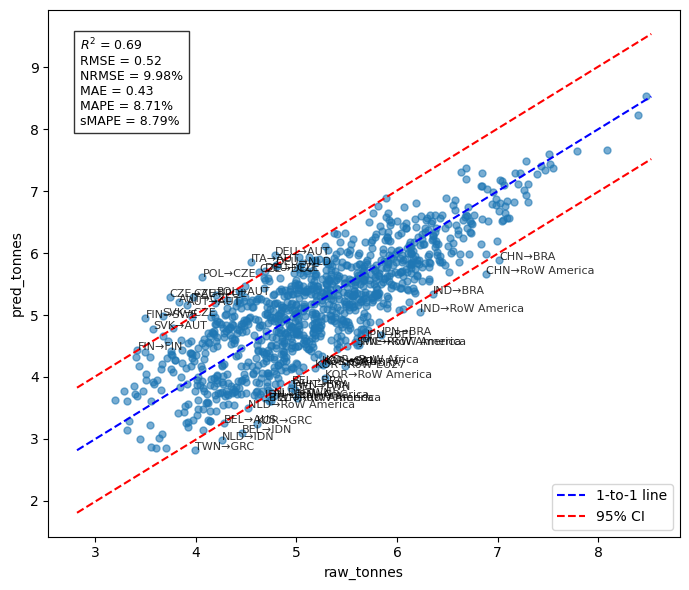

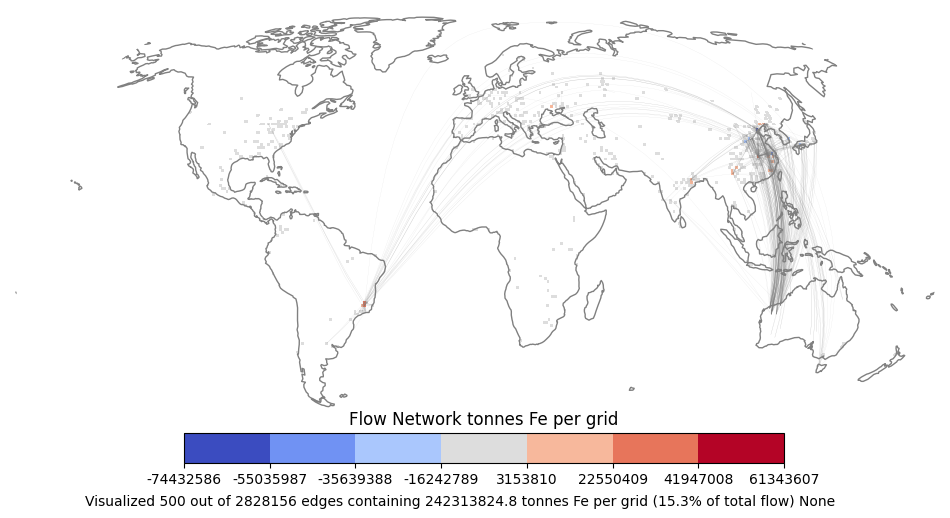

In [37]:
%load_ext autoreload
%autoreload 2

from FlowNetwork import FlowNetwork
import os

verbose = True

# Initialize the flow network with NetCDF data and variable names
grid_data_path = os.path.join('data', 'L.T.iron_flows.2000-2016_v2.a.nc')
trade_csv_path = os.path.join('data', 'iron_raw_import_export.csv')
json_path = os.path.join('data', 'grouped_region.json')
bilateral_csv_path = os.path.join('data', 'iron_io_stage_1_v2.csv')
trade_tariff_path = os.path.join('data', 'tariffsPairs_88_21_vbeta1-2024-12.csv')

fn = FlowNetwork(grid_data_path, 'source_1', 'sink_1', time='2016')
fn.gravity_model(distance='tariff', threshold_percentile=20, trade_tariff_path=trade_tariff_path, year=2016, tariff_weight_factor=1, verbose=True)
fn.ipf_flows(max_iters=100, tol=1e-6, verbose=verbose)
df = fn.bilateral_flow(2016, json_path)
fn.validate_bilateral(bilateral_csv_path, year=2016, x_log=False, y_log=False, rm_outliers=False)
fn.plot_network_map(caption=None, num_edges=500, vmin=None, vmax=None, color='coolwarm', levels=6, edge_thickness=1, edge_alpha=0.5, edge_color='gray')
# fn.check_mass_conservation(tol=1e-6, verbose=verbose)
# fn.analyze_degree_distribution(caption=None, verbose=verbose)
# fn.compute_marginal_country_trade(out_path=None, verbose=verbose)

# fn.compare_model_with_trade_data(trade_csv_path, "Fe_import", pred_col="estimated_imports", year=2016, raw_log=True, pred_log=True, rm_outliers=False)
# fn.compare_model_with_trade_data(trade_csv_path, "Fe_export", pred_col="estimated_exports", year=2016, raw_log=True, pred_log=True, rm_outliers=False)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Running Gravity Model...
[EXPONENTIAL] Mean adjusted distance: 10713.30
Edges after gravity calculation: 7982660
Gravity Model Complete. Ensemble Generated.
Running IPF...
Initial edges in ensemble: 7982660
IPF converged in 20 iterations
IPF complete. Flow matrix generated with 7982660 edges.


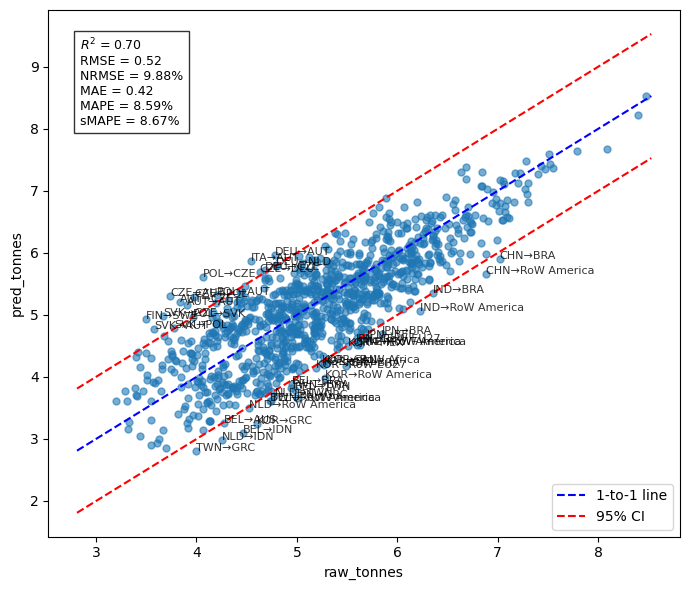

In [7]:
%load_ext autoreload
%autoreload 2

from FlowNetwork import FlowNetwork
import os
import pandas as pd

verbose = True

# Initialize the flow network with NetCDF data and variable names
grid_data_path = os.path.join('data', 'L.T.iron_flows.2000-2016_v2.a.nc')
trade_csv_path = os.path.join('data', 'iron_raw_import_export.csv')
json_path = os.path.join('data', 'grouped_region.json')
bilateral_csv_path = os.path.join('data', 'iron_io_stage_1_v2.csv')
trade_tariff_path = os.path.join('data', 'tariffsPairs_88_21_vbeta1-2024-12.csv')

fn = FlowNetwork(grid_data_path, 'source_1', 'sink_1', time='2016')
fn.gravity_model(distance='tariff', threshold_percentile=100, trade_tariff_path=trade_tariff_path, year=2016, tariff_weight_factor=1, verbose=True)
fn.ipf_flows(max_iters=100, tol=1e-6, verbose=verbose)
df = fn.bilateral_flow(2016, json_path)
fn.validate_bilateral(bilateral_csv_path, year=2016, x_log=True, y_log=True, rm_outliers=False)

# fn.plot_network_map(caption=None, num_edges=500, vmin=None, vmax=None, color='coolwarm', levels=6, edge_thickness=1, edge_alpha=0.5, edge_color='gray')
# fn.check_mass_conservation(tol=1e-6, verbose=verbose)
# fn.analyze_degree_distribution(caption=None, verbose=verbose)
# fn.compute_marginal_country_trade(out_path=None, verbose=verbose)

# fn.compare_model_with_trade_data(trade_csv_path, "Fe_import", pred_col="estimated_imports", year=2016, raw_log=True, pred_log=True, rm_outliers=False)
# fn.compare_model_with_trade_data(trade_csv_path, "Fe_export", pred_col="estimated_exports", year=2016, raw_log=True, pred_log=True, rm_outliers=False)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Running Gravity Model with thresholding at 90% of possible edges...
[EXPONENTIAL] Mean adjusted distance: 15032.12
Edges after gravity calculation: 7982660
After thresholding there are 7899543 edges containing 100.0% of total flow mass
Number of nodes after thresholding: 14623
Percent of inflow contained in remaining nodes: 100.0%
Percent of outflow contained in remaining nodes: 100.0%
Gravity Model Complete. Ensemble Generated.
Running IPF...
Initial edges in ensemble: 7899543
IPF converged in 20 iterations
IPF complete. Flow matrix generated with 7899543 edges.


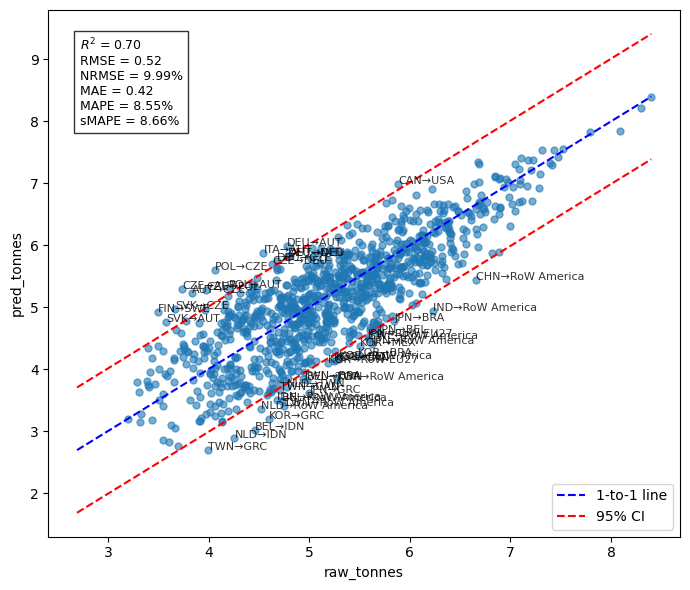

In [3]:
%load_ext autoreload
%autoreload 2

from FlowNetwork import FlowNetwork
import os
import pandas as pd

verbose = True

# Initialize the flow network with NetCDF data and variable names
grid_data_path = os.path.join('data', 'L.T.iron_flows.2000-2016_v3.a.nc')
trade_csv_path = os.path.join('data', 'iron_raw_import_export.csv')
json_path = os.path.join('data', 'grouped_region.json')
bilateral_csv_path = os.path.join('data', 'iron_io_stage_1_v3.csv')
trade_tariff_path = os.path.join('data', 'tariffsPairs_88_21_vbeta1-2024-12.csv')

fn = FlowNetwork(grid_data_path, 'source_1', 'sink_1', time='2016')
fn.gravity_model(distance='tariff', threshold_percentile=90, trade_tariff_path=trade_tariff_path, year=2016, tariff_weight_factor=2, verbose=True)
fn.ipf_flows(max_iters=100, tol=1e-6, verbose=verbose)
df = fn.bilateral_flow(2016, json_path)
df_val = fn.validate_bilateral(bilateral_csv_path, year=2016, x_log=True, y_log=True, rm_outliers=False)

# fn.plot_network_map(caption=None, num_edges=500, vmin=None, vmax=None, color='coolwarm', levels=6, edge_thickness=1, edge_alpha=0.5, edge_color='gray')
# fn.check_mass_conservation(tol=1e-6, verbose=verbose)
# fn.analyze_degree_distribution(caption=None, verbose=verbose)
# fn.compute_marginal_country_trade(out_path=None, verbose=verbose)

# fn.compare_model_with_trade_data(trade_csv_path, "Fe_import", pred_col="estimated_imports", year=2016, raw_log=True, pred_log=True, rm_outliers=False)
# fn.compare_model_with_trade_data(trade_csv_path, "Fe_export", pred_col="estimated_exports", year=2016, raw_log=True, pred_log=True, rm_outliers=False)


In [14]:
df_val[(df_val["exp_ISO3"] == "CHN") & (df_val["imp_ISO3"] != "CHN")]["raw_tonnes"].sum() * 1e-6

np.float64(172.98626252991286)

In [6]:
# 1) Filter to flows into China
df_in_to_chn = df_val[df_val['imp_ISO3'] == 'CHN']

# 2) Aggregate total imports by exporter
totals = (
    df_in_to_chn
      .groupby('exp_ISO3')['raw_tonnes']
      .sum()
      .sort_values(ascending=False)
)

# 3) Pick the top 5 exporters (you can exclude CHN itself if you want "external" competitors)
top5 = totals.head(5).index.tolist()
print("Top 5 exporters to CHN:", top5)

Top 5 exporters to CHN: ['AUS', 'CHN', 'BRA', 'IND', 'RUS']


In [7]:
# 4) Filter to only those top 5
df_top5 = df_in_to_chn[df_in_to_chn['exp_ISO3'].isin(top5)]

# 5) Sum and compute shares
agg = (
    df_top5
      .groupby('exp_ISO3')['raw_tonnes']
      .sum()
      .reset_index(name='tonnes')
)
total_to_chn = agg['tonnes'].sum()
agg['share_of_CHN_imports']  = agg['tonnes'] / total_to_chn

# 6) If CHN→CHN is in your top5, you can compute relative shares:
if 'CHN' in agg['exp_ISO3'].values:
    chn_self = agg.loc[agg['exp_ISO3']=='CHN','share_of_CHN_imports'].iloc[0]
    agg['relative_to_CHNself'] = agg['share_of_CHN_imports'] / chn_self
else:
    agg['relative_to_CHNself'] = pd.NA

print(agg)


  exp_ISO3        tonnes  share_of_CHN_imports  relative_to_CHNself
0      AUS  2.515850e+08              0.375655             1.258700
1      BRA  1.235302e+08              0.184449             0.618032
2      CHN  1.998768e+08              0.298446             1.000000
3      IND  6.136166e+07              0.091622             0.306997
4      RUS  3.337059e+07              0.049827             0.166956


In [8]:
agg.sum()

exp_ISO3                 AUSBRACHNINDRUS
tonnes                  669724204.643118
share_of_CHN_imports                 1.0
relative_to_CHNself             3.350685
dtype: object

In [40]:
df_delta = pd.read_csv('/Users/faisal/Documents/iESD/network_model/network-flow/data/iron_delta_stage_1.csv')
df_delta["exp_ISO3"] = df_delta["ISO3"]
df_delta["exp_delta"] = df_delta["delta"]
df_delta = df_delta[["exp_ISO3", "year", "exp_delta"]]
df_delta

,exp_ISO3,year,exp_delta
0,AUS,2008,-8.118836e+07
1,AUS,2009,-8.759302e+07
2,AUS,2010,-1.007790e+08
3,AUS,2011,-1.166014e+08
4,AUS,2012,-1.233012e+08
...,...,...,...
283,USA,2012,5.842113e+06
284,USA,2013,4.487098e+06
285,USA,2014,5.138665e+06
286,USA,2015,5.171759e+06


In [41]:
merged_df = df.merge(df_delta, on=["exp_ISO3", "year"], how="left")
merged_df

,exp_ISO3,imp_ISO3,year,tonnes,exp_delta
0,AUS,AUS,2016,2.477900e+06,-1.525646e+08
1,AUS,AUT,2016,9.722849e+05,-1.525646e+08
2,AUS,BEL,2016,7.639748e+05,-1.525646e+08
3,AUS,BRA,2016,1.593127e+06,-1.525646e+08
4,AUS,CAN,2016,9.052929e+05,-1.525646e+08
...,...,...,...,...,...
1019,USA,RoW Middle East,2016,1.465183e+06,4.270602e+06
1020,USA,SVK,2016,1.105165e+05,4.270602e+06
1021,USA,SWE,2016,2.719707e+05,4.270602e+06
1022,USA,TWN,2016,4.829258e+05,4.270602e+06


In [209]:
df

,exp_ISO3,imp_ISO3,year,tonnes
0,AUS,AUS,2016,2.477900e+06
1,AUS,AUT,2016,9.722849e+05
2,AUS,BEL,2016,7.639748e+05
3,AUS,BRA,2016,1.593127e+06
4,AUS,CAN,2016,9.052929e+05
...,...,...,...,...
1019,USA,RoW Middle East,2016,1.465183e+06
1020,USA,SVK,2016,1.105165e+05
1021,USA,SWE,2016,2.719707e+05
1022,USA,TWN,2016,4.829258e+05


In [213]:
df_grid = df.copy()
# Group by 'grouped_region' and 'year', and take mean of 'grade'
df_grid_imp = (
    df_grid
    .groupby(['imp_ISO3', 'year'], as_index=False)['tonnes']
    .sum()
)
df_grid_imp = df_grid_imp.rename(columns={"tonnes" : "pred_imports", "imp_ISO3":"ISO3"})
df_grid_exp = (
    df_grid
    .groupby(['exp_ISO3', 'year'], as_index=False)['tonnes']
    .sum()
)
df_grid_exp = df_grid_exp.rename(columns={"tonnes" : "pred_exports", "exp_ISO3":"ISO3"})
df_grid = df_grid_exp.merge(df_grid_imp, on=["ISO3", "year"])
df_grid

,ISO3,year,pred_exports,pred_imports
0,AUS,2016,2.963311e+08,5.099712e+06
1,AUT,2016,3.675093e+06,1.001642e+07
2,BEL,2016,2.454085e+06,8.400935e+06
3,BRA,2016,1.567863e+08,3.068470e+07
4,CAN,2016,2.294211e+07,9.936893e+06
5,CHN,2016,5.095552e+08,7.825399e+08
6,CZE,2016,2.816749e+06,7.345484e+06
7,DEU,2016,2.192351e+07,4.770777e+07
8,ESP,2016,7.358269e+06,1.294631e+07
9,FIN,2016,1.538379e+06,4.035334e+06


In [250]:
df_delta = pd.read_csv('/Users/faisal/Documents/iESD/network_model/network-flow/data/iron_delta_stage_1.csv')
df_delta = df_delta[df_delta["year"] == 2016]
df_delta = df_delta[["ISO3", "year", "exports", "imports"]]
df_delta

,ISO3,year,exports,imports
8,AUS,2016,4.493504e+08,5.450136e+06
17,AUT,2016,2.280044e+06,7.501595e+06
26,BEL,2016,5.346969e+06,9.784171e+06
35,BRA,2016,2.223898e+08,3.661511e+07
44,CAN,2016,2.081857e+07,1.299217e+07
53,CHN,2016,5.500828e+08,9.524161e+08
62,CZE,2016,1.950501e+06,5.854252e+06
71,DEU,2016,1.716839e+07,4.322934e+07
80,ESP,2016,4.669588e+06,1.150415e+07
89,FIN,2016,1.035324e+06,3.917288e+06


In [301]:
df_merged = df_grid.merge(df_delta, on=["ISO3", "year"])

df_merged["delta"] = (df_merged["pred_exports"] + df_merged["imports"]) - (df_merged["pred_imports"] + df_merged["exports"])

df_merged["adjusted_exports"] = df_merged["pred_exports"]
df_merged["adjusted_imports"] = df_merged["pred_imports"]

mask_neg = df_merged["delta"] < 0
df_merged.loc[mask_neg, "adjusted_imports"] = df_merged.loc[mask_neg, "pred_imports"] + df_merged.loc[mask_neg, "delta"]

mask_neg = df_merged["delta"] > 0
df_merged.loc[mask_neg, "adjusted_exports"] = df_merged.loc[mask_neg, "pred_exports"] - df_merged.loc[mask_neg, "delta"]

df_merged["delta_n"] = (df_merged["adjusted_exports"] + df_merged["imports"]) - (df_merged["adjusted_imports"] + df_merged["exports"])
df_merged

,ISO3,year,pred_exports,pred_imports,exports,imports,delta,adjusted_exports,adjusted_imports,delta_n
0,AUS,2016,2.963311e+08,5.099712e+06,4.493504e+08,5.450136e+06,-1.526689e+08,2.963311e+08,-1.475692e+08,0.000000e+00
1,AUT,2016,3.675093e+06,1.001642e+07,2.280044e+06,7.501595e+06,-1.119779e+06,3.675093e+06,8.896644e+06,0.000000e+00
2,BEL,2016,2.454085e+06,8.400935e+06,5.346969e+06,9.784171e+06,-1.509647e+06,2.454085e+06,6.891288e+06,0.000000e+00
3,BRA,2016,1.567863e+08,3.068470e+07,2.223898e+08,3.661511e+07,-5.967311e+07,1.567863e+08,-2.898841e+07,0.000000e+00
4,CAN,2016,2.294211e+07,9.936893e+06,2.081857e+07,1.299217e+07,5.178815e+06,1.776329e+07,9.936893e+06,0.000000e+00
5,CHN,2016,5.095552e+08,7.825399e+08,5.500828e+08,9.524161e+08,1.293487e+08,3.802065e+08,7.825399e+08,0.000000e+00
6,CZE,2016,2.816749e+06,7.345484e+06,1.950501e+06,5.854252e+06,-6.249839e+05,2.816749e+06,6.720500e+06,0.000000e+00
7,DEU,2016,2.192351e+07,4.770777e+07,1.716839e+07,4.322934e+07,2.766891e+05,2.164682e+07,4.770777e+07,0.000000e+00
8,ESP,2016,7.358269e+06,1.294631e+07,4.669588e+06,1.150415e+07,1.246519e+06,6.111751e+06,1.294631e+07,0.000000e+00
9,FIN,2016,1.538379e+06,4.035334e+06,1.035324e+06,3.917288e+06,3.850100e+05,1.153369e+06,4.035334e+06,0.000000e+00


In [284]:
# df_comb = df_merged.copy()
# df_comb["source_+_imports"] = df_comb["pred_exports"] + df_comb["imports"]
# df_comb["sink_+_exports"] = df_comb["pred_imports"] + df_comb["exports"]
# # Calculate initial difference
# df_comb["delta"] = df_comb["source_+_imports"] - df_comb["sink_+_exports"]

# # Create adjusted columns
# df_comb["adjusted_exports"] = df_comb["exports"].copy()
# df_comb["adjusted_imports"] = df_comb["imports"].copy()

# # Where source+imports < sink+exports (negative difference)
# mask_neg = df_comb["delta"] < 0
# df_comb.loc[mask_neg, "adjusted_imports"] = df_comb.loc[mask_neg, "pred_imports"] + abs(df_comb.loc[mask_neg, "delta"])

# # Where source+imports > sink+exports (positive difference) 
# mask_pos = df_comb["delta"] > 0
# df_comb.loc[mask_pos, "adjusted_exports"] = df_comb.loc[mask_pos, "pred_exports"] + df_comb.loc[mask_pos, "delta"]

# # Recalculate adjusted totals
# df_comb["adjusted_source_+_imports"] = df_comb["pred_exports"] + df_comb["adjusted_imports"]
# df_comb["adjusted_sink_+_exports"] = df_comb["pred_imports"] + df_comb["adjusted_exports"]
# df_comb

,ISO3,year,pred_exports,pred_imports,exports,imports,source_+_imports,sink_+_exports,delta,adjusted_exports,adjusted_imports,adjusted_source_+_imports,adjusted_sink_+_exports
0,AUS,2016,2.963311e+08,5.099712e+06,4.493504e+08,5.450136e+06,3.017812e+08,4.544501e+08,-1.526689e+08,4.493504e+08,1.577686e+08,4.540997e+08,4.544501e+08
1,AUT,2016,3.675093e+06,1.001642e+07,2.280044e+06,7.501595e+06,1.117669e+07,1.229647e+07,-1.119779e+06,2.280044e+06,1.113620e+07,1.481129e+07,1.229647e+07
2,BEL,2016,2.454085e+06,8.400935e+06,5.346969e+06,9.784171e+06,1.223826e+07,1.374790e+07,-1.509647e+06,5.346969e+06,9.910582e+06,1.236467e+07,1.374790e+07
3,BRA,2016,1.567863e+08,3.068470e+07,2.223898e+08,3.661511e+07,1.934014e+08,2.530745e+08,-5.967311e+07,2.223898e+08,9.035780e+07,2.471441e+08,2.530745e+08
4,CAN,2016,2.294211e+07,9.936893e+06,2.081857e+07,1.299217e+07,3.593428e+07,3.075546e+07,5.178815e+06,2.812092e+07,1.299217e+07,3.593428e+07,3.805781e+07
5,CHN,2016,5.095552e+08,7.825399e+08,5.500828e+08,9.524161e+08,1.461971e+09,1.332623e+09,1.293487e+08,6.389039e+08,9.524161e+08,1.461971e+09,1.421444e+09
6,CZE,2016,2.816749e+06,7.345484e+06,1.950501e+06,5.854252e+06,8.671001e+06,9.295985e+06,-6.249839e+05,1.950501e+06,7.970468e+06,1.078722e+07,9.295985e+06
7,DEU,2016,2.192351e+07,4.770777e+07,1.716839e+07,4.322934e+07,6.515285e+07,6.487616e+07,2.766891e+05,2.220020e+07,4.322934e+07,6.515285e+07,6.990797e+07
8,ESP,2016,7.358269e+06,1.294631e+07,4.669588e+06,1.150415e+07,1.886242e+07,1.761590e+07,1.246519e+06,8.604788e+06,1.150415e+07,1.886242e+07,2.155110e+07
9,FIN,2016,1.538379e+06,4.035334e+06,1.035324e+06,3.917288e+06,5.455668e+06,5.070658e+06,3.850100e+05,1.923389e+06,3.917288e+06,5.455668e+06,5.958723e+06


In [274]:
(9.418447e+05 + 1.260458e+06) - (7.767636e+05 + 1.260458e+06)

165081.1000000001

In [275]:
9.418447e+05 + 165081.1000000001

1106925.8

In [277]:
a = 2.294211e+07
b = 1.299217e+07
c = 9.936893e+06 + 5178817.0
d = 2.081857e+07

delta = (a + b) - (c+d)
delta

0.0

In [307]:
import matplotlib.pyplot as plt
import numpy as np

def _limplot(df, x_col, y_col, x_log=False, y_log=False, show_delta=False, rm_outliers=False):
    df_copy = df.dropna(subset=[x_col, y_col, "ISO3"]).copy()

    if x_log:
        df_copy = df_copy[df_copy[x_col] > 0]
        df_copy["x_plot"] = np.log10(df_copy[x_col])
        x_label = f"log10({x_col})"
    else:
        df_copy["x_plot"] = df_copy[x_col]
        x_label = x_col

    if y_log:
        df_copy = df_copy[df_copy[y_col] > 0]
        df_copy["y_plot"] = np.log10(df_copy[y_col])
        y_label = f"log10({y_col})"
    else:
        df_copy["y_plot"] = df_copy[y_col]
        y_label = y_col

    if rm_outliers:
        Q1_x, Q3_x = df_copy["x_plot"].quantile([0.25, 0.75])
        Q1_y, Q3_y = df_copy["y_plot"].quantile([0.25, 0.75])
        IQR_x, IQR_y = Q3_x - Q1_x, Q3_y - Q1_y

        df_copy = df_copy[
            (df_copy["x_plot"] >= Q1_x - 1.5 * IQR_x) & (df_copy["x_plot"] <= Q3_x + 1.5 * IQR_x) &
            (df_copy["y_plot"] >= Q1_y - 1.5 * IQR_y) & (df_copy["y_plot"] <= Q3_y + 1.5 * IQR_y)
        ]

    x_vals = df_copy["x_plot"].values
    y_vals = df_copy["y_plot"].values

    if len(x_vals) > 1:
        slope, intercept = np.polyfit(x_vals, y_vals, 1)
        y_pred = slope * x_vals + intercept

        # Metrics
        r2 = 1 - np.sum((y_vals - y_pred)**2) / np.sum((y_vals - np.mean(y_vals))**2)
        rmse = np.sqrt(np.mean((y_vals - x_vals)**2))
        mae = np.mean(np.abs(y_vals - x_vals))
        nrmse = rmse / np.mean(x_vals)
        mape = np.mean(np.abs((y_vals - x_vals) / x_vals)) * 100
        smape = np.mean(2 * np.abs(y_vals - x_vals) / (np.abs(x_vals) + np.abs(y_vals))) * 100
    else:
        r2 = rmse = mae = nrmse = mape = smape = np.nan

    # Compute residuals and CI
    residuals = y_vals - x_vals
    std_residual = np.std(residuals)
    ci = 1.96 * std_residual

    # Define the 1:1 line
    min_val = min(x_vals.min(), y_vals.min())
    max_val = max(x_vals.max(), y_vals.max())
    x_line = np.array([min_val, max_val])
    y_line = x_line

    # Plot
    fig, ax = plt.subplots(figsize=(7, 6))
    ax.scatter(x_vals, y_vals, alpha=0.6, s=25)
    ax.plot(x_line, y_line, 'b--', label='1-to-1 line')
    ax.plot(x_line, y_line + ci, 'r--', label='95% Error Band')
    ax.plot(x_line, y_line - ci, 'r--')


    if show_delta and "delta" in df_copy.columns:
        delta = df_copy["delta"].values

        if x_log and y_log:
            # In log-log space, compute shifted log10 values
            pred = 10 ** y_vals  # Convert from log10 to linear scale
            shifted = pred - delta

            # Prevent log10 of non-positive values
            shifted = np.where(shifted <= 0, pred, shifted)

            shifted_log = np.log10(shifted)
            log_shift = shifted_log - y_vals  # Directional log space shift

            upper_errors = np.where(log_shift < 0, -log_shift, 0)
            lower_errors = np.where(log_shift > 0,  log_shift, 0)

        else:
            # Linear scale: use delta directionally
            lower_errors = np.where(delta < 0, -delta, 0)
            upper_errors = np.where(delta > 0,  delta, 0)

        # Draw asymmetric error bars
        ax.errorbar(
            x_vals,
            y_vals,
            yerr=[upper_errors, lower_errors],
            fmt='none',
            ecolor='gray',
            capsize=3,
            alpha=0.6,
            label='Bilateral delta shift'
        )



    # Annotate points outside the CI
    for i in range(len(df_copy)):
        # if abs(residuals[i]) > ci:
        ax.annotate(df_copy["ISO3"].iloc[i],
                    (x_vals[i], y_vals[i]),
                    fontsize=8,
                    alpha=0.8)

    # Annotate statistics
    ax.text(
        0.05, 0.95,
        f"$R^2$ = {r2:.2f}\n"
        f"RMSE = {rmse:.2f}\n"
        f"NRMSE = {nrmse:.2%}\n"
        f"MAE = {mae:.2f}\n"
        f"MAPE = {mape:.2f}%\n"
        f"sMAPE = {smape:.2f}%",
        transform=ax.transAxes,
        fontsize=9,
        verticalalignment='top',
        bbox=dict(facecolor='white', alpha=0.8)
    )

    ax.legend()
    ax.set_xlabel(x_col)
    ax.set_ylabel(y_col)
    ax.set_aspect('equal', adjustable='box')
    plt.tight_layout()
    plt.show()


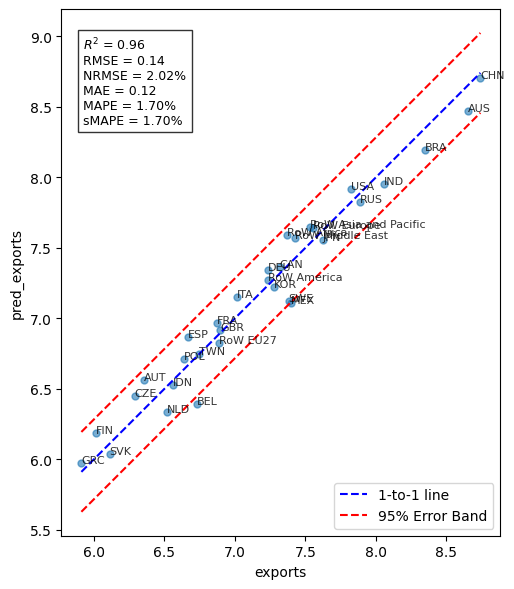

In [310]:
_limplot(
    df_merged,
    x_col='exports',
    y_col='pred_exports',
    x_log=True,
    y_log=True,
    show_delta=False,
    rm_outliers=False
)

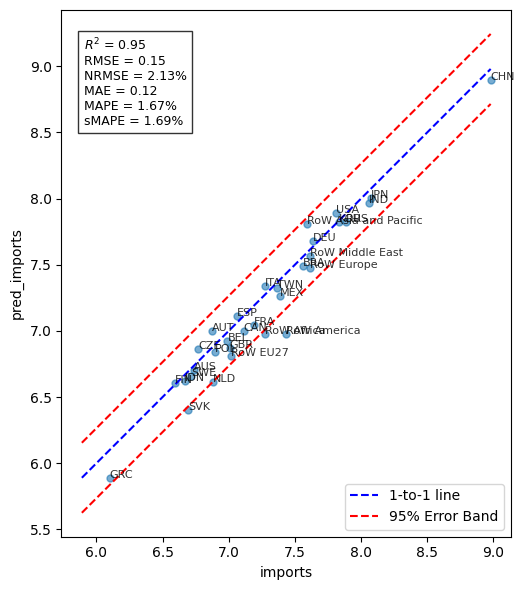

In [311]:
_limplot(
    df_merged,
    x_col='imports',
    y_col='pred_imports',
    x_log=True,
    y_log=True,
    show_delta=False,
    rm_outliers=False
)

In [42]:
df_delta = pd.read_csv('/Users/faisal/Documents/iESD/network_model/network-flow/data/iron_delta_stage_1.csv')
df_delta["imp_ISO3"] = df_delta["ISO3"]
df_delta["imp_delta"] = df_delta["delta"]
df_delta = df_delta[["imp_ISO3", "year", "imp_delta"]]
df_delta

,imp_ISO3,year,imp_delta
0,AUS,2008,-8.118836e+07
1,AUS,2009,-8.759302e+07
2,AUS,2010,-1.007790e+08
3,AUS,2011,-1.166014e+08
4,AUS,2012,-1.233012e+08
...,...,...,...
283,USA,2012,5.842113e+06
284,USA,2013,4.487098e+06
285,USA,2014,5.138665e+06
286,USA,2015,5.171759e+06


In [43]:
merged_df = merged_df.merge(df_delta, on=["imp_ISO3", "year"], how="left")
merged_df

,exp_ISO3,imp_ISO3,year,tonnes,exp_delta,imp_delta
0,AUS,AUS,2016,2.477900e+06,-1.525646e+08,-1.525646e+08
1,AUS,AUT,2016,9.722849e+05,-1.525646e+08,1.252737e+06
2,AUS,BEL,2016,7.639748e+05,-1.525646e+08,1.084931e+05
3,AUS,BRA,2016,1.593127e+06,-1.525646e+08,-5.999704e+07
4,AUS,CAN,2016,9.052929e+05,-1.525646e+08,3.508213e+06
...,...,...,...,...,...,...
1019,USA,RoW Middle East,2016,1.465183e+06,4.270602e+06,1.294257e+07
1020,USA,SVK,2016,1.105165e+05,4.270602e+06,1.050894e+06
1021,USA,SWE,2016,2.719707e+05,4.270602e+06,-1.024595e+07
1022,USA,TWN,2016,4.829258e+05,4.270602e+06,2.109445e+06


In [48]:
len(merged_df["exp_ISO3"].unique())

32

In [194]:
import numpy as np
df_delta = pd.read_csv('/Users/faisal/Documents/iESD/network_model/network-flow/data/iron_delta_stage_1.csv')
# delta=(source+imports)−(sink+exports)
df_delta["exp_net_delta"] = np.where(df_delta["delta"] > 0, df_delta["delta"], 0)
df_delta["imp_net_delta"] = np.where(df_delta["delta"] < 0, df_delta["delta"], 0)
df_delta

,Unnamed: 0,ISO3,year,sink_1,source_1,imports,exports,source_+_imports,sink_+_exports,ISO3_y,delta,exp_net_delta,imp_net_delta
0,0,AUS,2008,7.492280e+06,1.298955e+08,9.392942e+06,2.129845e+08,1.392884e+08,2.204768e+08,AUS_2008,-8.118836e+07,0.000000e+00,-8.118836e+07
1,1,AUS,2009,5.036240e+06,1.374814e+08,6.920180e+06,2.269584e+08,1.444016e+08,2.319946e+08,AUS_2009,-8.759302e+07,0.000000e+00,-8.759302e+07
2,2,AUS,2010,7.131440e+06,1.611708e+08,8.037231e+06,2.628557e+08,1.692081e+08,2.699871e+08,AUS_2010,-1.007790e+08,0.000000e+00,-1.007790e+08
3,3,AUS,2011,6.341860e+06,1.521090e+08,8.089176e+06,2.704577e+08,1.601982e+08,2.767996e+08,AUS_2011,-1.166014e+08,0.000000e+00,-1.166014e+08
4,4,AUS,2012,4.746695e+06,1.846017e+08,6.092890e+06,3.092491e+08,1.906946e+08,3.139958e+08,AUS_2012,-1.233012e+08,0.000000e+00,-1.233012e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,370,USA,2012,8.627159e+07,9.093721e+07,7.169084e+07,7.051435e+07,1.626281e+08,1.567859e+08,USA_2012,5.842113e+06,5.842113e+06,0.000000e+00
284,371,USA,2013,8.437377e+07,8.864417e+07,6.962456e+07,6.940786e+07,1.582687e+08,1.537816e+08,USA_2013,4.487098e+06,4.487098e+06,0.000000e+00
285,372,USA,2014,8.565781e+07,9.022723e+07,7.045556e+07,6.988632e+07,1.606828e+08,1.555441e+08,USA_2014,5.138665e+06,5.138665e+06,0.000000e+00
286,373,USA,2015,7.681167e+07,8.184850e+07,6.507909e+07,6.494415e+07,1.469276e+08,1.417558e+08,USA_2015,5.171759e+06,5.171759e+06,0.000000e+00


In [195]:
# Count how many bilateral links each exporter has
export_link_counts = df.groupby(["exp_ISO3", "year"]).size().rename("exp_link_count").reset_index()
merged_df = merged_df.merge(export_link_counts, on=["exp_ISO3", "year"], how="left")

# Count how many bilateral links each importer has
import_link_counts = merged_df.groupby(["imp_ISO3", "year"]).size().rename("imp_link_count").reset_index()
merged_df = merged_df.merge(import_link_counts, on=["imp_ISO3", "year"], how="left")

# Dividing the export-side surplus among all export links of that country
# Dividing the import-side deficit among all import links of that country

# Now distribute deltas per link
merged_df["bilateral_delta"] = (
    merged_df["exp_net_delta"] / merged_df["exp_link_count"] +
    merged_df["imp_net_delta"] / merged_df["imp_link_count"]
)
merged_df

,exp_ISO3,imp_ISO3,year,tonnes,exp_net_delta,imp_net_delta,exp_total,imp_total,exp_share,imp_share,bilateral_delta,exp_link_count,imp_link_count
0,AUS,AUS,2016,2.477900e+06,0.000000e+00,-1.525646e+08,2.963311e+08,5.099712e+06,0.008362,0.485890,-4.767644e+06,32,32
1,AUS,AUT,2016,9.722849e+05,0.000000e+00,0.000000e+00,2.963311e+08,1.001642e+07,0.003281,0.097069,0.000000e+00,32,32
2,AUS,BEL,2016,7.639748e+05,0.000000e+00,0.000000e+00,2.963311e+08,8.400935e+06,0.002578,0.090939,0.000000e+00,32,32
3,AUS,BRA,2016,1.593127e+06,0.000000e+00,-5.999704e+07,2.963311e+08,3.068470e+07,0.005376,0.051919,-1.874908e+06,32,32
4,AUS,CAN,2016,9.052929e+05,0.000000e+00,0.000000e+00,2.963311e+08,9.936893e+06,0.003055,0.091104,0.000000e+00,32,32
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019,USA,RoW Middle East,2016,1.465183e+06,4.270602e+06,0.000000e+00,8.282189e+07,3.657321e+07,0.017691,0.040062,1.334563e+05,32,32
1020,USA,SVK,2016,1.105165e+05,4.270602e+06,0.000000e+00,8.282189e+07,2.531664e+06,0.001334,0.043654,1.334563e+05,32,32
1021,USA,SWE,2016,2.719707e+05,4.270602e+06,-1.024595e+07,8.282189e+07,4.566946e+06,0.003284,0.059552,-1.867297e+05,32,32
1022,USA,TWN,2016,4.829258e+05,4.270602e+06,0.000000e+00,8.282189e+07,2.109272e+07,0.005831,0.022895,1.334563e+05,32,32


In [197]:
import numpy as np
df_delta = pd.read_csv('/Users/faisal/Documents/iESD/network_model/network-flow/data/iron_delta_stage_1.csv')
# delta=(source+imports)−(sink+exports)
df_delta["exp_net_delta"] = np.where(df_delta["delta"] > 0, df_delta["delta"], 0)
df_delta["imp_net_delta"] = np.where(df_delta["delta"] < 0, df_delta["delta"], 0)
df_delta

,Unnamed: 0,ISO3,year,sink_1,source_1,imports,exports,source_+_imports,sink_+_exports,ISO3_y,delta,exp_net_delta,imp_net_delta
0,0,AUS,2008,7.492280e+06,1.298955e+08,9.392942e+06,2.129845e+08,1.392884e+08,2.204768e+08,AUS_2008,-8.118836e+07,0.000000e+00,-8.118836e+07
1,1,AUS,2009,5.036240e+06,1.374814e+08,6.920180e+06,2.269584e+08,1.444016e+08,2.319946e+08,AUS_2009,-8.759302e+07,0.000000e+00,-8.759302e+07
2,2,AUS,2010,7.131440e+06,1.611708e+08,8.037231e+06,2.628557e+08,1.692081e+08,2.699871e+08,AUS_2010,-1.007790e+08,0.000000e+00,-1.007790e+08
3,3,AUS,2011,6.341860e+06,1.521090e+08,8.089176e+06,2.704577e+08,1.601982e+08,2.767996e+08,AUS_2011,-1.166014e+08,0.000000e+00,-1.166014e+08
4,4,AUS,2012,4.746695e+06,1.846017e+08,6.092890e+06,3.092491e+08,1.906946e+08,3.139958e+08,AUS_2012,-1.233012e+08,0.000000e+00,-1.233012e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,370,USA,2012,8.627159e+07,9.093721e+07,7.169084e+07,7.051435e+07,1.626281e+08,1.567859e+08,USA_2012,5.842113e+06,5.842113e+06,0.000000e+00
284,371,USA,2013,8.437377e+07,8.864417e+07,6.962456e+07,6.940786e+07,1.582687e+08,1.537816e+08,USA_2013,4.487098e+06,4.487098e+06,0.000000e+00
285,372,USA,2014,8.565781e+07,9.022723e+07,7.045556e+07,6.988632e+07,1.606828e+08,1.555441e+08,USA_2014,5.138665e+06,5.138665e+06,0.000000e+00
286,373,USA,2015,7.681167e+07,8.184850e+07,6.507909e+07,6.494415e+07,1.469276e+08,1.417558e+08,USA_2015,5.171759e+06,5.171759e+06,0.000000e+00


In [198]:
# Merge exporter-side surplus
merged_df = df.merge(
    df_delta[["ISO3", "year", "exp_net_delta"]].rename(columns={"ISO3": "exp_ISO3"}),
    on=["exp_ISO3", "year"],
    how="left"
)

# Merge importer-side deficit
merged_df = merged_df.merge(
    df_delta[["ISO3", "year", "imp_net_delta"]].rename(columns={"ISO3": "imp_ISO3"}),
    on=["imp_ISO3", "year"],
    how="left"
)

In [199]:
# 2. Compute total exports and imports (based on predicted tonnes)
export_totals = merged_df.groupby(["exp_ISO3", "year"])["tonnes"].sum().rename("exp_total").reset_index()
import_totals = merged_df.groupby(["imp_ISO3", "year"])["tonnes"].sum().rename("imp_total").reset_index()

merged_df = merged_df.merge(export_totals, on=["exp_ISO3", "year"], how="left")
merged_df = merged_df.merge(import_totals, on=["imp_ISO3", "year"], how="left")

# 3. Compute share of each flow
merged_df["exp_share"] = merged_df["tonnes"] / merged_df["exp_total"]
merged_df["imp_share"] = merged_df["tonnes"] / merged_df["imp_total"]

# Replace NaN shares with 0 (e.g., division by 0)
merged_df["exp_share"] = merged_df["exp_share"].fillna(0)
merged_df["imp_share"] = merged_df["imp_share"].fillna(0)

# 4. Apply weighted delta
merged_df["bilateral_delta"] = (
    merged_df["exp_share"] * merged_df["exp_net_delta"] +
    merged_df["imp_share"] * merged_df["imp_net_delta"]
)

merged_df

,exp_ISO3,imp_ISO3,year,tonnes,exp_net_delta,imp_net_delta,exp_total,imp_total,exp_share,imp_share,bilateral_delta
0,AUS,AUS,2016,2.477900e+06,0.000000e+00,-1.525646e+08,2.963311e+08,5.099712e+06,0.008362,0.485890,-7.412963e+07
1,AUS,AUT,2016,9.722849e+05,0.000000e+00,0.000000e+00,2.963311e+08,1.001642e+07,0.003281,0.097069,0.000000e+00
2,AUS,BEL,2016,7.639748e+05,0.000000e+00,0.000000e+00,2.963311e+08,8.400935e+06,0.002578,0.090939,0.000000e+00
3,AUS,BRA,2016,1.593127e+06,0.000000e+00,-5.999704e+07,2.963311e+08,3.068470e+07,0.005376,0.051919,-3.115002e+06
4,AUS,CAN,2016,9.052929e+05,0.000000e+00,0.000000e+00,2.963311e+08,9.936893e+06,0.003055,0.091104,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...
1019,USA,RoW Middle East,2016,1.465183e+06,4.270602e+06,0.000000e+00,8.282189e+07,3.657321e+07,0.017691,0.040062,7.555022e+04
1020,USA,SVK,2016,1.105165e+05,4.270602e+06,0.000000e+00,8.282189e+07,2.531664e+06,0.001334,0.043654,5.698640e+03
1021,USA,SWE,2016,2.719707e+05,4.270602e+06,-1.024595e+07,8.282189e+07,4.566946e+06,0.003284,0.059552,-5.961429e+05
1022,USA,TWN,2016,4.829258e+05,4.270602e+06,0.000000e+00,8.282189e+07,2.109272e+07,0.005831,0.022895,2.490144e+04


Biggest shift occurs at:
exporter                  Slovakia
importer                    Brazil
year                          2016
raw_tonnes            20990.223288
exp_ISO3                       SVK
imp_ISO3                       BRA
pred_tonnes            3655.643558
exp_net_delta       1050893.518814
imp_net_delta     -59997044.714228
exp_total           1085306.943763
imp_total          30684697.033764
exp_share                 0.003368
imp_share                 0.000119
bilateral_delta       -3608.062598
ISO3                       SVK→BRA
x_plot                    4.322017
y_plot                    3.562964
Name: 803, dtype: object


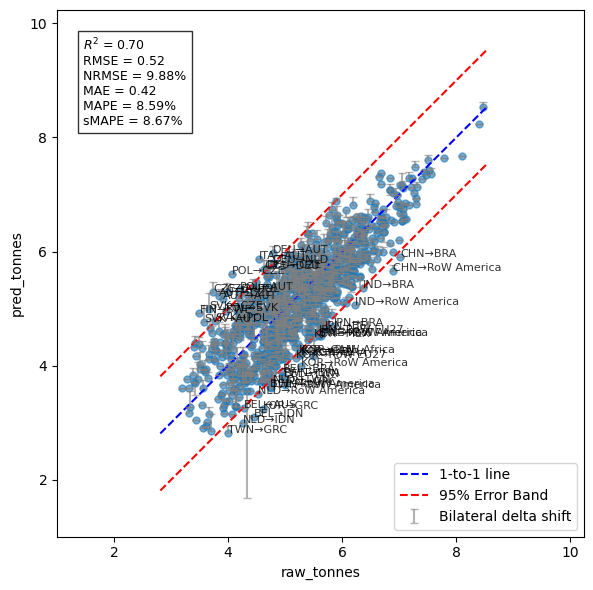

In [200]:
import matplotlib.pyplot as plt

def _limplot(df, x_col, y_col, x_log=False, y_log=False, show_delta=False, rm_outliers=False):
    df_copy = df.dropna(subset=[x_col, y_col, "ISO3"]).copy()

    if x_log:
        df_copy = df_copy[df_copy[x_col] > 0]
        df_copy["x_plot"] = np.log10(df_copy[x_col])
        x_label = f"log10({x_col})"
    else:
        df_copy["x_plot"] = df_copy[x_col]
        x_label = x_col

    if y_log:
        df_copy = df_copy[df_copy[y_col] > 0]
        df_copy["y_plot"] = np.log10(df_copy[y_col])
        y_label = f"log10({y_col})"
    else:
        df_copy["y_plot"] = df_copy[y_col]
        y_label = y_col

    if rm_outliers:
        Q1_x, Q3_x = df_copy["x_plot"].quantile([0.25, 0.75])
        Q1_y, Q3_y = df_copy["y_plot"].quantile([0.25, 0.75])
        IQR_x, IQR_y = Q3_x - Q1_x, Q3_y - Q1_y

        df_copy = df_copy[
            (df_copy["x_plot"] >= Q1_x - 1.5 * IQR_x) & (df_copy["x_plot"] <= Q3_x + 1.5 * IQR_x) &
            (df_copy["y_plot"] >= Q1_y - 1.5 * IQR_y) & (df_copy["y_plot"] <= Q3_y + 1.5 * IQR_y)
        ]

    x_vals = df_copy["x_plot"].values
    y_vals = df_copy["y_plot"].values

    if len(x_vals) > 1:
        slope, intercept = np.polyfit(x_vals, y_vals, 1)
        y_pred = slope * x_vals + intercept

        # Metrics
        r2 = 1 - np.sum((y_vals - y_pred)**2) / np.sum((y_vals - np.mean(y_vals))**2)
        rmse = np.sqrt(np.mean((y_vals - x_vals)**2))
        mae = np.mean(np.abs(y_vals - x_vals))
        nrmse = rmse / np.mean(x_vals)
        mape = np.mean(np.abs((y_vals - x_vals) / x_vals)) * 100
        smape = np.mean(2 * np.abs(y_vals - x_vals) / (np.abs(x_vals) + np.abs(y_vals))) * 100
    else:
        r2 = rmse = mae = nrmse = mape = smape = np.nan

    # Compute residuals and CI
    residuals = y_vals - x_vals
    std_residual = np.std(residuals)
    ci = 1.96 * std_residual

    # Define the 1:1 line
    min_val = min(x_vals.min(), y_vals.min())
    max_val = max(x_vals.max(), y_vals.max())
    x_line = np.array([min_val, max_val])
    y_line = x_line

    # Plot
    fig, ax = plt.subplots(figsize=(7, 6))
    ax.scatter(x_vals, y_vals, alpha=0.6, s=25)
    ax.plot(x_line, y_line, 'b--', label='1-to-1 line')
    ax.plot(x_line, y_line + ci, 'r--', label='95% Error Band')
    ax.plot(x_line, y_line - ci, 'r--')


    if show_delta and "bilateral_delta" in df_copy.columns:
        delta = df_copy["bilateral_delta"].values

        if x_log and y_log:
            # For log-log plot: compute log10(pred + delta) - log10(pred)
            pred = 10 ** y_vals  # y_vals are already log10(pred)
            shifted = pred + delta

            # Avoid log10 of zero or negative
            shifted = np.where(shifted <= 0, pred, shifted)

            shifted_log = np.log10(shifted)
            log_shift = shifted_log - y_vals  # in log space

            lower_errors = np.where(log_shift < 0, -log_shift, 0)
            upper_errors = np.where(log_shift > 0,  log_shift, 0)
            
            # Find index of the largest shift
            max_shift_idx = np.argmax(np.abs(log_shift))

            # View the corresponding row
            print("Biggest shift occurs at:")
            print(df_copy.iloc[max_shift_idx])

            ax.set_xlim(1, max(np.max(y_vals), np.max(x_vals)) * 1.2)
            ax.set_ylim(1, max(np.max(y_vals), np.max(x_vals)) * 1.2)
        else:
            # For linear scale: use delta directly
            lower_errors = np.where(delta < 0, -delta, 0)
            upper_errors = np.where(delta > 0,  delta, 0)
        
        # Draw asymmetric error bars
        ax.errorbar(
            x_vals,
            y_vals,
            yerr=[lower_errors, upper_errors],
            fmt='none',
            ecolor='gray',
            capsize=3,
            alpha=0.6,
            label='Bilateral delta shift'
        )


    # Annotate points outside the CI
    for i in range(len(df_copy)):
        if abs(residuals[i]) > ci:
            ax.annotate(df_copy["ISO3"].iloc[i],
                        (x_vals[i], y_vals[i]),
                        fontsize=8,
                        alpha=0.8)

    # Annotate statistics
    ax.text(
        0.05, 0.95,
        f"$R^2$ = {r2:.2f}\n"
        f"RMSE = {rmse:.2f}\n"
        f"NRMSE = {nrmse:.2%}\n"
        f"MAE = {mae:.2f}\n"
        f"MAPE = {mape:.2f}%\n"
        f"sMAPE = {smape:.2f}%",
        transform=ax.transAxes,
        fontsize=9,
        verticalalignment='top',
        bbox=dict(facecolor='white', alpha=0.8)
    )

    ax.legend()
    ax.set_xlabel(x_col)
    ax.set_ylabel(y_col)
    ax.set_aspect('equal', adjustable='box')
    plt.tight_layout()
    plt.show()

def validate_bilateral(bilateral_csv_path, year, x_log=False, y_log=False, show_delta=False, rm_outliers=False):

    raw_df = pd.read_csv(bilateral_csv_path)
    if year:
        raw_df = raw_df[raw_df["year"] == year]
    
    # pred_df = self.bilateral_df
    pred_df = merged_df
    # 1) filter to the correct year
    raw_y  = raw_df[raw_df.year == year ].copy().rename(columns={'tonnes':'raw_tonnes'})
    pred_y = pred_df[pred_df.year == year].copy().rename(columns={'tonnes':'pred_tonnes'})

    # 2) merge on exp_ISO3, imp_ISO3, year
    val_df = pd.merge(
        raw_y, pred_y,
        on=['exp_ISO3','imp_ISO3','year'],
        how='inner'
    )
    # 3) label for annotation
    val_df['ISO3'] = val_df['exp_ISO3'] + '→' + val_df['imp_ISO3']

    # 5) plot
    _limplot(
        val_df,
        x_col='raw_tonnes',
        y_col='pred_tonnes',
        x_log=x_log,
        y_log=y_log,
        show_delta=show_delta,
        rm_outliers=rm_outliers
    )

validate_bilateral(bilateral_csv_path, year=2016, x_log=True, y_log=True, show_delta=True, rm_outliers=False)

In [187]:
d_t = pd.read_csv(bilateral_csv_path)
d_t[(d_t["exp_ISO3"] == "SVK") & (d_t["imp_ISO3"] == "BRA")]

,exporter,importer,year,tonnes,exp_ISO3,imp_ISO3
7227,Slovakia,Brazil,2008,31562.719821,SVK,BRA
7228,Slovakia,Brazil,2009,23790.086174,SVK,BRA
7229,Slovakia,Brazil,2010,25486.243655,SVK,BRA
7230,Slovakia,Brazil,2011,26732.093388,SVK,BRA
7231,Slovakia,Brazil,2012,24559.886803,SVK,BRA
7232,Slovakia,Brazil,2013,22776.680189,SVK,BRA
7233,Slovakia,Brazil,2014,22417.696271,SVK,BRA
7234,Slovakia,Brazil,2015,21170.424805,SVK,BRA
7235,Slovakia,Brazil,2016,20990.223288,SVK,BRA


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Running Gravity Model with thresholding at 90% of possible edges...
[EXPONENTIAL] Mean adjusted distance: 8360.76
Edges after gravity calculation: 7982660
After thresholding there are 7899721 edges containing 100.0% of total flow mass
Number of nodes after thresholding: 14623
Percent of inflow contained in remaining nodes: 100.0%
Percent of outflow contained in remaining nodes: 100.0%
Gravity Model Complete. Ensemble Generated.
Running IPF...
Initial edges in ensemble: 7899721
IPF converged in 25 iterations
IPF complete. Flow matrix generated with 7899721 edges.


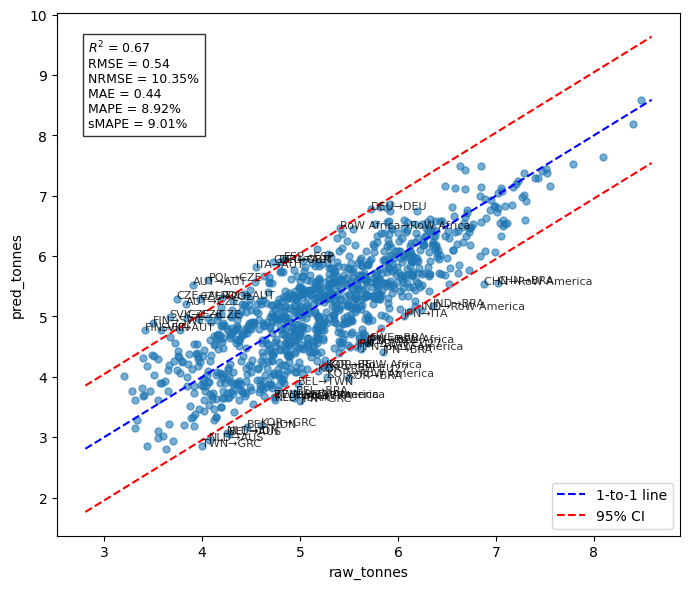

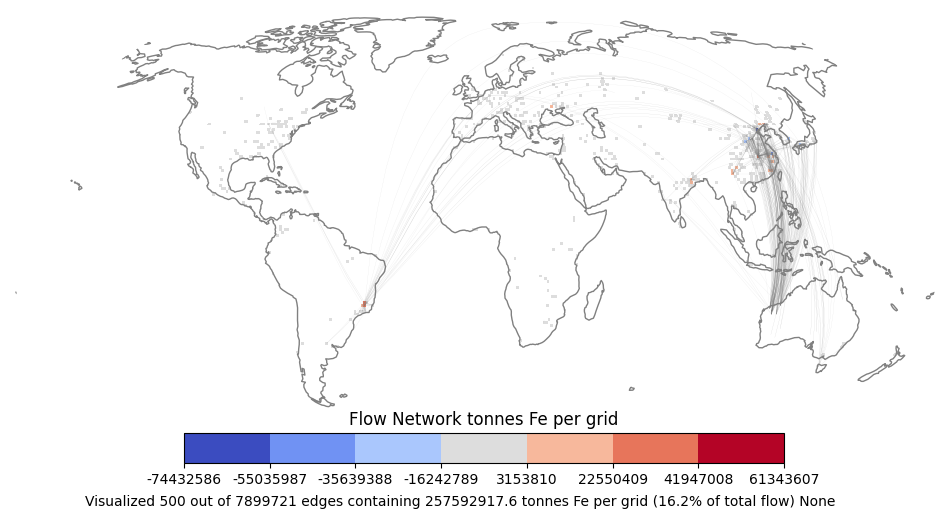

In [201]:
%load_ext autoreload
%autoreload 2

from FlowNetwork import FlowNetwork
import os

verbose = True

# Initialize the flow network with NetCDF data and variable names
grid_data_path = os.path.join('data', 'L.T.iron_flows.2000-2016_v2.a.nc')
trade_csv_path = os.path.join('data', 'iron_raw_import_export.csv')
json_path = os.path.join('data', 'grouped_region.json')
bilateral_csv_path = os.path.join('data', 'iron_io_stage_1_v2.csv')
trade_tariff_path = os.path.join('data', 'tariffsPairs_88_21_vbeta1-2024-12.csv')

fn = FlowNetwork(grid_data_path, 'source_1', 'sink_1', time='2016')
fn.gravity_model(distance='tariff', threshold_percentile=90, trade_tariff_path=trade_tariff_path, year=2016, mode='exponential', tariff_weight_factor=0.1, verbose=True)
fn.ipf_flows(max_iters=100, tol=1e-6, verbose=verbose)
df_lin = fn.bilateral_flow(2016, json_path)
fn.validate_bilateral(bilateral_csv_path, year=2016, x_log=True, y_log=True, rm_outliers=False)
fn.plot_network_map(caption=None, num_edges=500, vmin=None, vmax=None, color='coolwarm', levels=6, edge_thickness=1, edge_alpha=0.5, edge_color='gray')
# fn.check_mass_conservation(tol=1e-6, verbose=verbose)
# fn.analyze_degree_distribution(caption=None, verbose=verbose)
# fn.compute_marginal_country_trade(out_path=None, verbose=verbose)

# fn.compare_model_with_trade_data(trade_csv_path, "Fe_import", pred_col="estimated_imports", year=2016, raw_log=True, pred_log=True, rm_outliers=False)
# fn.compare_model_with_trade_data(trade_csv_path, "Fe_export", pred_col="estimated_exports", year=2016, raw_log=True, pred_log=True, rm_outliers=False)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Running Gravity Model...
[EXPONENTIAL] Mean adjusted distance: 16054.83
Edges after gravity calculation: 197317926
Gravity Model Complete. Ensemble Generated.
Running IPF...
Initial edges in ensemble: 197317926
IPF converged in 21 iterations
IPF complete. Flow matrix generated with 197317926 edges.


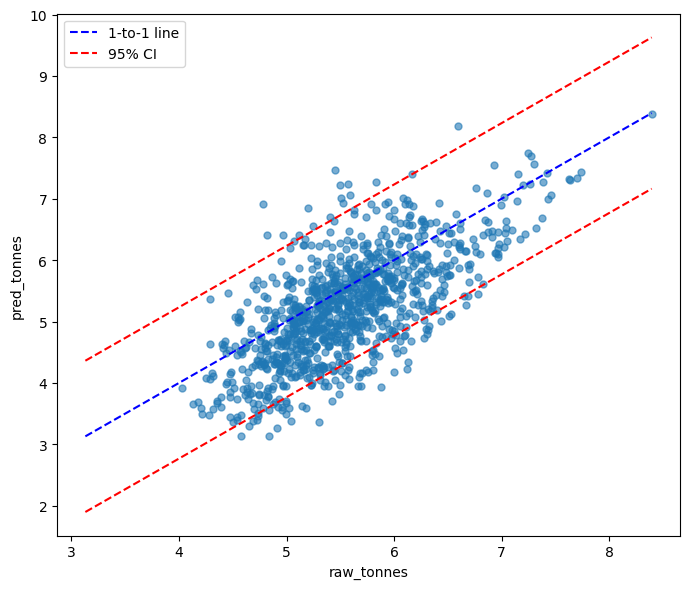

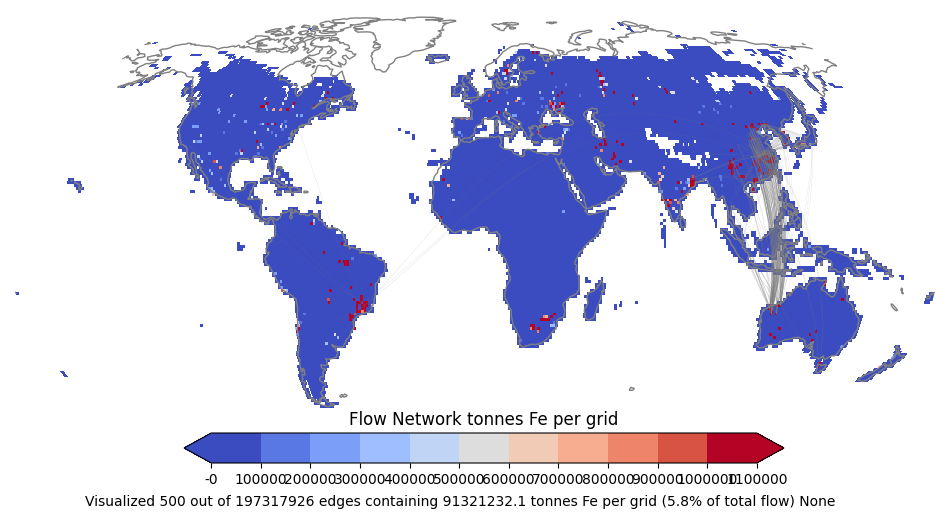

In [316]:
%load_ext autoreload
%autoreload 2

from FlowNetwork import FlowNetwork
import os

verbose = True

# Initialize the flow network with NetCDF data and variable names
grid_data_path = os.path.join('data', 'L.T.iron_flows.2000-2016_v2.a.nc')
trade_csv_path = os.path.join('data', 'iron_raw_import_export.csv')
json_path = os.path.join('data', 'grouped_region.json')
bilateral_csv_path = os.path.join('data', 'iron_io_stage_2_v2.csv')
trade_tariff_path = os.path.join('data', 'tariffsPairs_88_21_vbeta1-2024-12.csv')

fn = FlowNetwork(grid_data_path, 'source_1', 'sink_2', time='2016')
# fn.gravity_model(distance='pairwise_haversine', threshold_percentile=90, year=2016, verbose=True)
fn.gravity_model(distance='tariff', threshold_percentile=100, trade_tariff_path=trade_tariff_path, year=2016, mode='exponential', tariff_weight_factor=2.0, verbose=True)
fn.ipf_flows(max_iters=100, tol=1e-6, verbose=verbose)
df_2 = fn.bilateral_flow(2016, json_path)
fn.validate_bilateral(bilateral_csv_path, year=2016, x_log=True, y_log=True, rm_outliers=False)
fn.plot_network_map(caption=None, num_edges=500, vmin=-1e-6, vmax=1e6, extend_max=True, extend_min=True, color='coolwarm', levels=10, edge_thickness=1, edge_alpha=0.5, edge_color='gray')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Running Gravity Model with thresholding at 20% of possible edges...
[SIGMOID] Mean adjusted distance: 14571.07
Edges after gravity calculation: 7974141
After thresholding there are 2817663 edges containing 99.0% of total flow mass
Number of nodes after thresholding: 14608
Percent of inflow contained in remaining nodes: 100.0%
Percent of outflow contained in remaining nodes: 100.0%
Gravity Model Complete. Ensemble Generated.
Running IPF...
Initial edges in ensemble: 2817663
IPF converged in 32 iterations
IPF complete. Flow matrix generated with 2817663 edges.


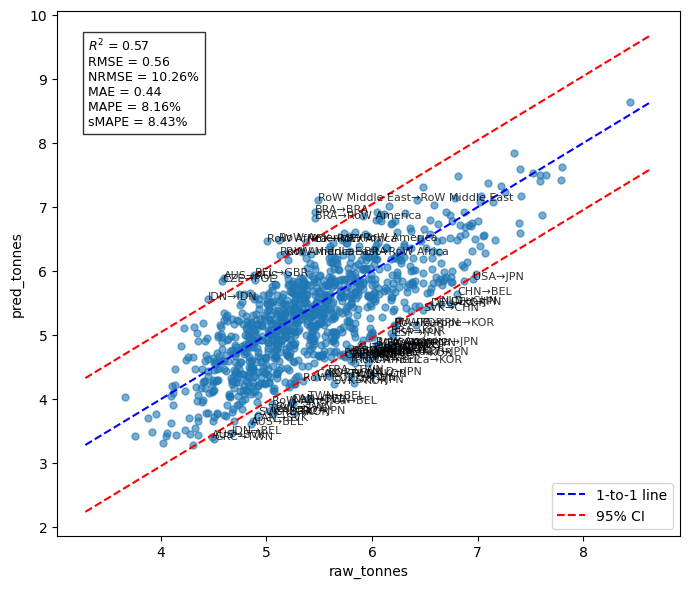

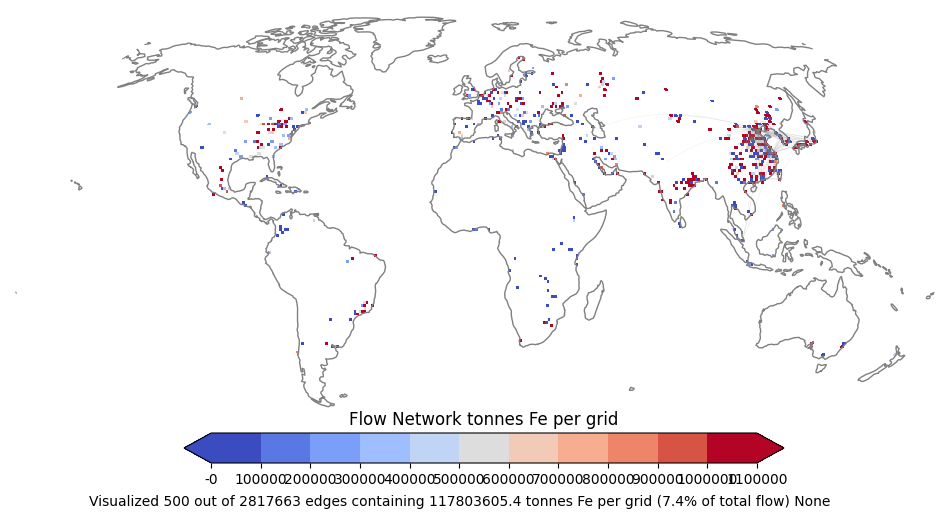

In [348]:
%load_ext autoreload
%autoreload 2

from FlowNetwork import FlowNetwork
import os

verbose = True

# Initialize the flow network with NetCDF data and variable names
grid_data_path = os.path.join('data', 'L.T.iron_flows.2000-2016_v2.a.nc')
trade_csv_path = os.path.join('data', 'iron_raw_import_export.csv')
json_path = os.path.join('data', 'grouped_region.json')
bilateral_csv_path = os.path.join('data', 'iron_io_stage_2_v3.csv')
trade_tariff_path = os.path.join('data', 'tariffsPairs_88_21_vbeta1-2024-12.csv')

fn = FlowNetwork(grid_data_path, 'source_2', 'sink_2', time='2016')
# fn.gravity_model(distance='pairwise_haversine', threshold_percentile=90, year=2016, verbose=True)
fn.gravity_model(distance='tariff', threshold_percentile=20, trade_tariff_path=trade_tariff_path, year=2016, mode='sigmoid', tariff_weight_factor=1.0, verbose=True)
fn.ipf_flows(max_iters=100, tol=1e-6, verbose=verbose)
df_2 = fn.bilateral_flow(2016, json_path)
fn.validate_bilateral(bilateral_csv_path, year=2016, x_log=True, y_log=True, rm_outliers=False)
fn.plot_network_map(caption=None, num_edges=500, vmin=0, vmax=1e6, extend_max=True, extend_min=True, color='coolwarm', levels=10, edge_thickness=1, edge_alpha=0.5, edge_color='gray')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Running Gravity Model with thresholding at 20% of possible edges...
[SIGMOID] Mean adjusted distance: 14183.49
Edges after gravity calculation: 7974141
After thresholding there are 2818291 edges containing 99.0% of total flow mass
Number of nodes after thresholding: 14608
Percent of inflow contained in remaining nodes: 100.0%
Percent of outflow contained in remaining nodes: 100.0%
Gravity Model Complete. Ensemble Generated.
Running IPF...
Initial edges in ensemble: 2818291
IPF converged in 31 iterations
IPF complete. Flow matrix generated with 2818291 edges.


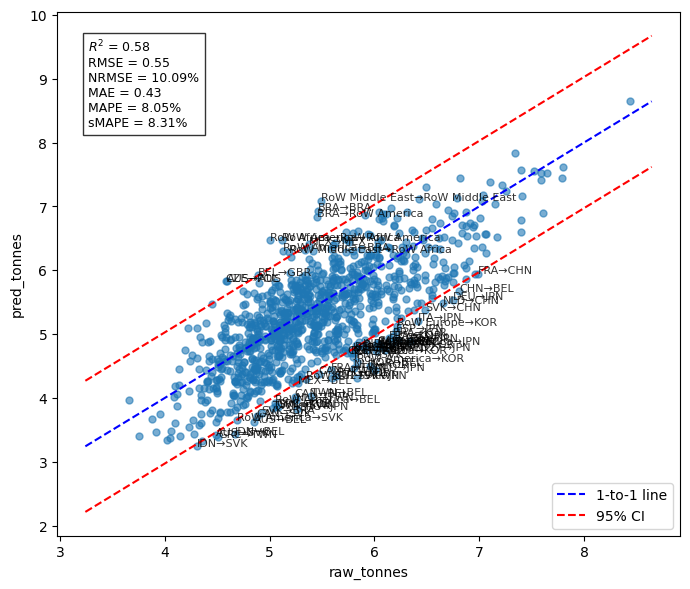

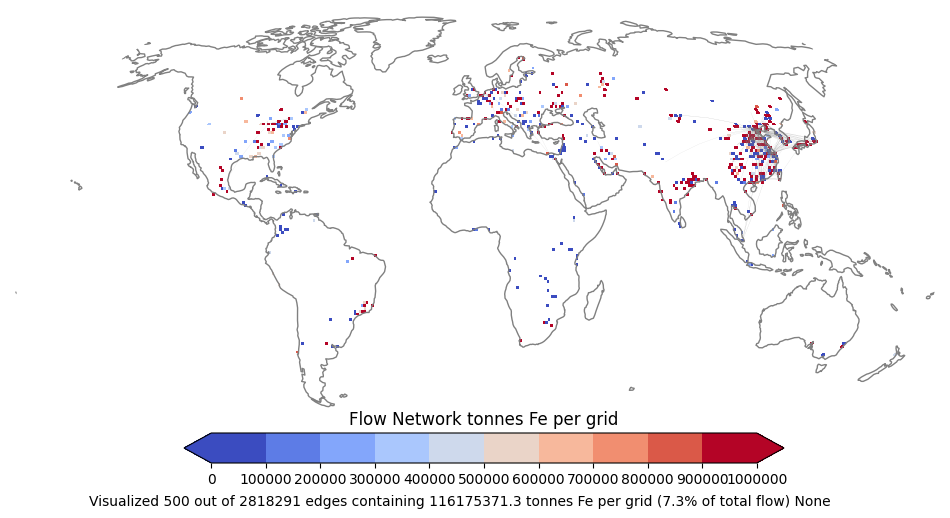

In [351]:
%load_ext autoreload
%autoreload 2

from FlowNetwork import FlowNetwork
import os

verbose = True

# Initialize the flow network with NetCDF data and variable names
grid_data_path = os.path.join('data', 'L.T.iron_flows.2000-2016_v2.a.nc')
trade_csv_path = os.path.join('data', 'iron_raw_import_export.csv')
json_path = os.path.join('data', 'grouped_region.json')
bilateral_csv_path = os.path.join('data', 'iron_io_stage_2_v3.csv')
trade_tariff_path = os.path.join('data', 'tariffsPairs_88_21_vbeta1-2024-12.csv')

fn = FlowNetwork(grid_data_path, 'source_2', 'sink_2', time='2016')
# fn.gravity_model(distance='pairwise_haversine', threshold_percentile=90, year=2016, verbose=True)
fn.gravity_model(distance='tariff', threshold_percentile=20, trade_tariff_path=trade_tariff_path, year=2016, mode='sigmoid', tariff_weight_factor=1.0, alpha=1.0, a=2.0, b=20, c=0.3, verbose=True)
fn.ipf_flows(max_iters=100, tol=1e-6, verbose=verbose)
df_2 = fn.bilateral_flow(2016, json_path)
fn.validate_bilateral(bilateral_csv_path, year=2016, x_log=True, y_log=True, rm_outliers=False)
fn.plot_network_map(caption=None, num_edges=500, vmin=0, vmax=1e6, extend_max=True, extend_min=True, color='coolwarm', levels=10, edge_thickness=1, edge_alpha=0.5, edge_color='gray')

In [341]:
df_grid = df_2.copy()
# Group by 'grouped_region' and 'year', and take mean of 'grade'
df_grid_imp = (
    df_grid
    .groupby(['imp_ISO3', 'year'], as_index=False)['tonnes']
    .sum()
)
df_grid_imp = df_grid_imp.rename(columns={"tonnes" : "pred_imports", "imp_ISO3":"ISO3"})
df_grid_exp = (
    df_grid
    .groupby(['exp_ISO3', 'year'], as_index=False)['tonnes']
    .sum()
)
df_grid_exp = df_grid_exp.rename(columns={"tonnes" : "pred_exports", "exp_ISO3":"ISO3"})
df_grid = df_grid_exp.merge(df_grid_imp, on=["ISO3", "year"])
df_grid

,ISO3,year,pred_exports,pred_imports
0,AUS,2016,2.962159e+08,1.174991e+07
1,AUT,2016,3.668702e+06,4.672378e+06
2,BEL,2016,2.449603e+06,3.327934e+06
3,BRA,2016,1.566638e+08,2.075522e+07
4,CAN,2016,2.292899e+07,2.022734e+07
5,CHN,2016,5.092948e+08,6.373293e+08
6,CZE,2016,2.811462e+06,4.109333e+06
7,DEU,2016,2.186827e+07,3.286160e+07
8,ESP,2016,7.348390e+06,1.022673e+07
9,FIN,2016,1.535672e+06,2.909988e+06


In [342]:
df_delta = pd.read_csv('data/iron_io_stage_2_v2.csv')
# Group by 'grouped_region' and 'year', and take mean of 'grade'
df_grid_imp = (
    df_delta
    .groupby(['imp_ISO3', 'year'], as_index=False)['tonnes']
    .sum()
)
df_grid_imp = df_grid_imp.rename(columns={"tonnes" : "imports", "imp_ISO3":"ISO3"})
df_grid_exp = (
    df_delta
    .groupby(['exp_ISO3', 'year'], as_index=False)['tonnes']
    .sum()
)
df_grid_exp = df_grid_exp.rename(columns={"tonnes" : "exports", "exp_ISO3": "ISO3"})
df_delta = df_grid_exp.merge(df_grid_imp, on=["ISO3", "year"])
df_delta


,ISO3,year,exports,imports
0,AUS,2008,8.216812e+06,8.360835e+06
1,AUS,2009,7.641834e+06,7.734983e+06
2,AUS,2010,8.805666e+06,9.046298e+06
3,AUS,2011,9.405305e+06,9.592456e+06
4,AUS,2012,9.555384e+06,9.943997e+06
...,...,...,...,...
283,USA,2012,1.006807e+08,1.059434e+08
284,USA,2013,1.061394e+08,1.127454e+08
285,USA,2014,1.073227e+08,1.149376e+08
286,USA,2015,1.036480e+08,1.120016e+08


In [343]:
df_merged = df_grid.merge(df_delta, on=["ISO3", "year"])

df_merged["delta"] = (df_merged["pred_exports"] + df_merged["imports"]) - (df_merged["pred_imports"] + df_merged["exports"])

df_merged["adjusted_exports"] = df_merged["pred_exports"]
df_merged["adjusted_imports"] = df_merged["pred_imports"]

mask_neg = df_merged["delta"] < 0
df_merged.loc[mask_neg, "adjusted_imports"] = df_merged.loc[mask_neg, "pred_imports"] + df_merged.loc[mask_neg, "delta"]

mask_neg = df_merged["delta"] > 0
df_merged.loc[mask_neg, "adjusted_exports"] = df_merged.loc[mask_neg, "pred_exports"] - df_merged.loc[mask_neg, "delta"]

df_merged["delta_n"] = (df_merged["adjusted_exports"] + df_merged["imports"]) - (df_merged["adjusted_imports"] + df_merged["exports"])
df_merged

,ISO3,year,pred_exports,pred_imports,exports,imports,delta,adjusted_exports,adjusted_imports,delta_n
0,AUS,2016,2.962159e+08,1.174991e+07,1.012123e+07,1.033266e+07,2.846774e+08,1.153848e+07,1.174991e+07,-7.450581e-09
1,AUT,2016,3.668702e+06,4.672378e+06,7.168016e+06,7.603188e+06,-5.685023e+05,3.668702e+06,4.103875e+06,0.000000e+00
2,BEL,2016,2.449603e+06,3.327934e+06,1.524675e+07,1.665596e+07,5.308767e+05,1.918726e+06,3.327934e+06,0.000000e+00
3,BRA,2016,1.566638e+08,2.075522e+07,2.172049e+07,2.345721e+07,1.376452e+08,1.901850e+07,2.075522e+07,-2.980232e-08
4,CAN,2016,2.292899e+07,2.022734e+07,1.804145e+07,1.849898e+07,3.159175e+06,1.976981e+07,2.022734e+07,0.000000e+00
5,CHN,2016,5.092948e+08,6.373293e+08,6.344343e+08,6.214341e+08,-1.410348e+08,5.092948e+08,4.962945e+08,0.000000e+00
6,CZE,2016,2.811462e+06,4.109333e+06,7.379087e+06,8.239238e+06,-4.377198e+05,2.811462e+06,3.671613e+06,0.000000e+00
7,DEU,2016,2.186827e+07,3.286160e+07,5.352950e+07,5.948799e+07,-5.034837e+06,2.186827e+07,2.782676e+07,0.000000e+00
8,ESP,2016,7.348390e+06,1.022673e+07,2.380287e+07,2.625057e+07,-4.306356e+05,7.348390e+06,9.796095e+06,0.000000e+00
9,FIN,2016,1.535672e+06,2.909988e+06,3.743660e+06,4.488386e+06,-6.295899e+05,1.535672e+06,2.280398e+06,0.000000e+00


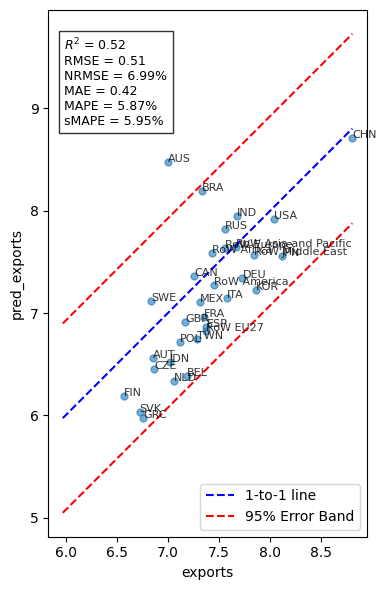

In [345]:
_limplot(
    df_merged,
    x_col='exports',
    y_col='pred_exports',
    x_log=True,
    y_log=True,
    show_delta=False,
    rm_outliers=False
)

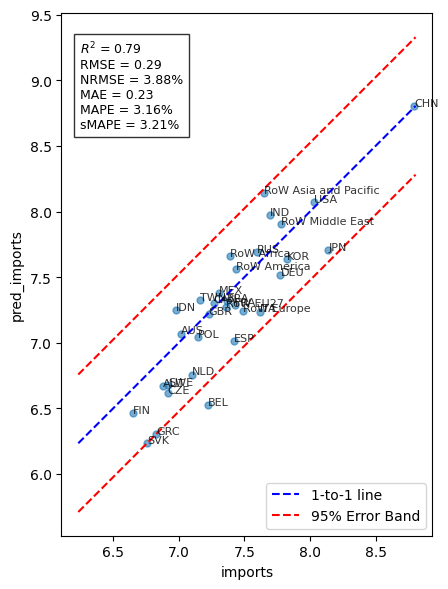

In [347]:
_limplot(
    df_merged,
    x_col='imports',
    y_col='pred_imports',
    x_log=True,
    y_log=True,
    show_delta=False,
    rm_outliers=False
)